Question 1: XOR Gate Classification<br>
II. Implement the following:<br>
(Implementation 5 marks and Visualization and documentation 5 marks)<br>
<br>
• Scenario: The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.<br>
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.<br>
<br>
• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the output of an XOR gate. Perform the following steps:<br>
• Create the XOR gate's truth table dataset.<br>
• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch Pitts) Neuron.<br>
• Observe and discuss the perceptron's performance in this scenario.<br>
• Implement XOR using Multi-Layer Perceptron.<br>

Introduction to XOR Classification Using Neural Networks<br>
<br>
Overview: The XOR gate is a classic problem in machine learning and neural networks due to its non-linearly separable nature. A Single Layer Perceptron fails to classify XOR outputs correctly because it can only handle linearly separable problems. In contrast, a Multi-Layer Perceptron (MLP) can solve XOR by learning non-linear patterns through hidden layers.<br>
<br>
Objective: The aim of this lab test is to:
1. Implement a Single Layer Perceptron to classify XOR outputs.<br>
2. Analyze its limitations.<br>
3. Implement a Multi-Layer Perceptron to solve the XOR problem.<br>
4. Visualize the decision boundaries and training loss.<br>

1. Create XOR's Truth Table Dataset
<br>
The XOR gate is a binary gate that outputs 1 only when the two inputs are different.<br>

| Input A | Input B | XOR Output |
|---------|---------|------------|
|    0    |    0    |     0      |
|    0    |    1    |     1      |
|    1    |    0    |     1      |
|    1    |    1    |     0      |

In [1]:
import numpy as np

# XOR truth table
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# XOR outputs
y = np.array([0, 1, 1, 0])


2. Implement Single Layer Perceptron Using MCP Neuron<br>
<br>
Concept: A Single Layer Perceptron consists of an input layer and an output neuron. It uses a linear combination of the input features and applies a step function to predict binary outputs. However, a perceptron can only learn linearly separable patterns.<br>
<br>
Implementation: The perceptron is implemented without relying on pre-built libraries. The weights and biases are initialized and updated based on the difference between the predicted and actual outputs during training.

In [2]:
# Define the activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Single Layer Perceptron
def perceptron_train(X, y, epochs=10, lr=0.1):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0
    
    for epoch in range(epochs):
        for i in range(len(X)):
            linear_output = np.dot(X[i], weights) + bias
            prediction = step_function(linear_output)
            
            # Update rule: w = w + lr * (y - pred) * x
            weights += lr * (y[i] - prediction) * X[i]
            bias += lr * (y[i] - prediction)
        
        # Optionally, print weights and bias to observe the learning process
        print(f"Epoch {epoch+1}: Weights: {weights}, Bias: {bias}")
    
    return weights, bias

# Training the perceptron
weights, bias = perceptron_train(X, y)


Epoch 1: Weights: [-0.1  0. ], Bias: -0.1
Epoch 2: Weights: [-0.1  0. ], Bias: 0.0
Epoch 3: Weights: [-0.1  0. ], Bias: 0.0
Epoch 4: Weights: [-0.1  0. ], Bias: 0.0
Epoch 5: Weights: [-0.1  0. ], Bias: 0.0
Epoch 6: Weights: [-0.1  0. ], Bias: 0.0
Epoch 7: Weights: [-0.1  0. ], Bias: 0.0
Epoch 8: Weights: [-0.1  0. ], Bias: 0.0
Epoch 9: Weights: [-0.1  0. ], Bias: 0.0
Epoch 10: Weights: [-0.1  0. ], Bias: 0.0


Test the Perceptron

In [3]:
def perceptron_predict(X, weights, bias):
    predictions = []
    for x in X:
        linear_output = np.dot(x, weights) + bias
        predictions.append(step_function(linear_output))
    return predictions

# Predict on the XOR dataset
predictions = perceptron_predict(X, weights, bias)
print("Predictions:", predictions)


Predictions: [1, 1, 0, 0]


Explanation: This function trains a single-layer perceptron using a step function to classify XOR outputs. It updates the weights and bias using the perceptron learning rule. However, due to XOR’s non-linearity, this model will fail to classify XOR correctly, which we will discuss further in the results section.

3. Performance Analysis of the Single Layer Perceptron<br>
<br>
Observation: A Single Layer Perceptron struggles to classify XOR because the XOR problem is not linearly separable. The decision boundary generated by the perceptron will be linear, and thus, it cannot correctly separate the data points for the XOR gate.<br>
<br>
When the model is tested, it will misclassify at least one input combination, often predicting outputs like [0, 0, 0, 0] or [1, 1, 1, 1]. And here predictions are: [1,1,0,0].<br>
<br>
Conclusion: The Single Layer Perceptron is insufficient for solving non-linear problems like XOR. This highlights the need for a more complex model capable of learning non-linear decision boundaries, such as the Multi-Layer Perceptron.<br>

4. Implement XOR Using Multi-Layer Perceptron (MLP)<br>
<br>
Concept: A Multi-Layer Perceptron introduces hidden layers, allowing the model to learn non-linear patterns. The MLP uses a sigmoid activation function in the hidden layer and output layer to model complex relationships between inputs and outputs.<br>
<br>
Implementation: The following code trains an MLP with one hidden layer of 2 neurons, which is sufficient to solve the XOR problem:

In [4]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Multi-Layer Perceptron
def mlp_train(X, y, epochs=10000, lr=0.1):
    # Initialize weights
    input_layer_neurons = X.shape[1]  # Number of features (2 for XOR)
    hidden_layer_neurons = 2          # We use 2 hidden neurons
    output_neuron = 1                 # Output layer has 1 neuron

    # Random weight initialization
    np.random.seed(1)
    hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
    hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
    output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neuron))
    output_bias = np.random.uniform(size=(1, output_neuron))

    # Training process
    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_input)

        # Backpropagation
        error = y - predicted_output
        d_predicted_output = error * sigmoid_derivative(predicted_output)

        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        # Updating weights and biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
        hidden_weights += X.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {np.mean(np.abs(error))}")
    
    return hidden_weights, hidden_bias, output_weights, output_bias

# Train the MLP
hidden_weights, hidden_bias, output_weights, output_bias = mlp_train(X, y.reshape(-1, 1))

# Predict using MLP
def mlp_predict(X, hidden_weights, hidden_bias, output_weights, output_bias):
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)
    
    return np.round(predicted_output)

# Predictions
mlp_predictions = mlp_predict(X, hidden_weights, hidden_bias, output_weights, output_bias)
print("MLP Predictions:", mlp_predictions.flatten())


Epoch 0, Loss: 0.49970187910871167
Epoch 1000, Loss: 0.4996995090256889
Epoch 2000, Loss: 0.49819105799928537
Epoch 3000, Loss: 0.48302460749663123
Epoch 4000, Loss: 0.41627202394127505
Epoch 5000, Loss: 0.3253706342179714
Epoch 6000, Loss: 0.1678195681202969
Epoch 7000, Loss: 0.10955529478216153
Epoch 8000, Loss: 0.08455596607016312
Epoch 9000, Loss: 0.07053888527765591
MLP Predictions: [0. 1. 1. 0.]


Explanation: This MLP implementation uses backpropagation to adjust the weights and biases, learning non-linear patterns. The loss is computed and minimized using the sigmoid derivative.

5. Visualization

5.1. Training Loss over Epochs

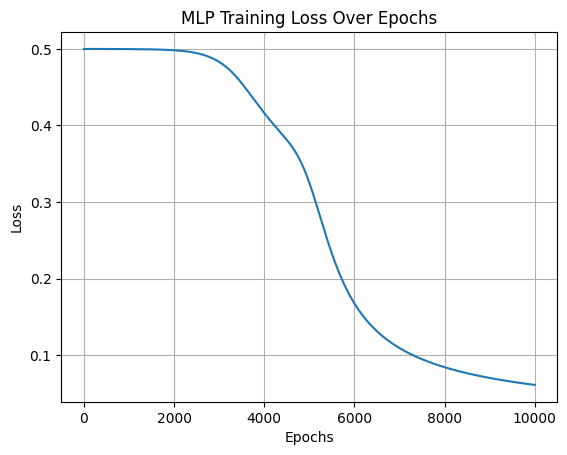

In [5]:
import matplotlib.pyplot as plt

def mlp_train_with_loss(X, y, epochs=10000, lr=0.1):
    input_layer_neurons = X.shape[1]
    hidden_layer_neurons = 2
    output_neuron = 1

    np.random.seed(1)
    hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
    hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
    output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neuron))
    output_bias = np.random.uniform(size=(1, output_neuron))

    loss_history = []

    for epoch in range(epochs):
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_input)

        error = y - predicted_output
        loss = np.mean(np.abs(error))
        loss_history.append(loss)

        d_predicted_output = error * sigmoid_derivative(predicted_output)
        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
        hidden_weights += X.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

    return hidden_weights, hidden_bias, output_weights, output_bias, loss_history

# Train MLP and capture the loss history
hidden_weights, hidden_bias, output_weights, output_bias, loss_history = mlp_train_with_loss(X, y.reshape(-1, 1))

# Plot loss over epochs
plt.plot(loss_history)
plt.title('MLP Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


Explanation: As the epochs increase, the loss decreases, indicating that the MLP is learning to correctly classify the XOR outputs. The loss function helps track the model's convergence.

5.2. Decision Boundary Visualization

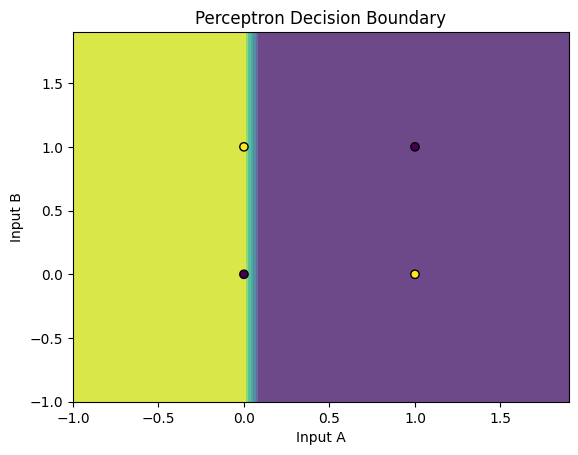

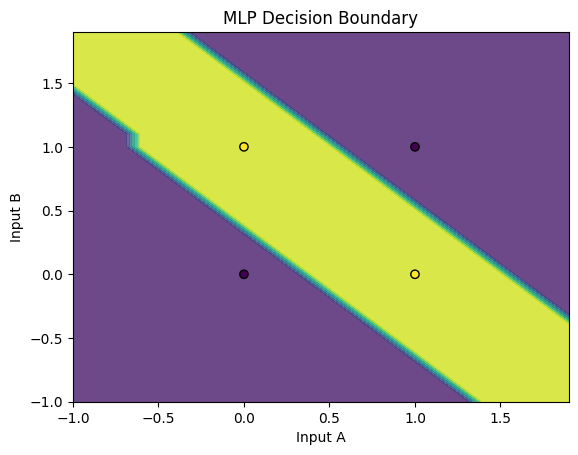

In [7]:
def plot_decision_boundary(model_predict, weights, bias=None, title="Decision Boundary", is_mlp=False):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    if is_mlp:
        # For MLP: Pass all the weights and biases
        hidden_weights, hidden_bias, output_weights, output_bias = weights
        Z = model_predict(grid, hidden_weights, hidden_bias, output_weights, output_bias)
    else:
        # For Perceptron: Pass weights and bias
        Z = model_predict(grid, weights, bias)
    
    Z = np.array(Z).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Input A")
    plt.ylabel("Input B")
    plt.show()

# Plot perceptron decision boundary
plot_decision_boundary(perceptron_predict, weights, bias, title="Perceptron Decision Boundary")

# Plot MLP decision boundary
plot_decision_boundary(mlp_predict, (hidden_weights, hidden_bias, output_weights, output_bias), title="MLP Decision Boundary", is_mlp=True)


Training Loss over Epochs: This graph will show how the loss decreases as the MLP learns to classify the XOR gate correctly.<br>
Decision Boundary: The decision boundary plot visualizes the regions where the model classifies the XOR gate as 0 or 1. The perceptron will fail to separate the classes correctly, while the MLP should produce a non-linear boundary to solve the XOR problem.<br>
<br>
Explanation:<br>
<br>
1. The Single Layer Perceptron generates a linear decision boundary, which is incapable of separating the XOR outputs.<br>
2. The MLP generates a non-linear decision boundary, successfully classifying the XOR outputs.<br>

Conclusion:<br>
The XOR gate problem demonstrates the limitations of a Single Layer Perceptron, which cannot solve non-linearly separable problems. By introducing a hidden layer, the Multi-Layer Perceptron can successfully learn and classify XOR outputs, showcasing the importance of deeper architectures in neural networks. The visualizations of the decision boundaries and loss plots help understand the training process and model performance.